In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:
data = np.load('../fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac'][0:,0]
raw_Y=raw_Y.astype(np.float64)
raw_Y=np.expand_dims(raw_Y,-1)
NUM_TIMESTEPS = 65
BATCH_SIZE = 256   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 1) (1000, 1)


In [4]:
model = Sequential()
model.add(Dense(64,activation= 'sigmoid',input_shape=(65,)))
model.add(BatchNormalization())
model.add(Dense(128,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(256,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2

In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
model.fit('fc_bn0.h5')
 

Epoch 1/3000
8/8 [==============================] - 1s 18ms/step - loss: 11.2842 - mean_squared_error: 11.2842 - val_loss: 11.0233 - val_mean_squared_error: 11.0233
Epoch 2/3000
8/8 [==============================] - 0s 5ms/step - loss: 9.1695 - mean_squared_error: 9.1695 - val_loss: 10.1390 - val_mean_squared_error: 10.1390
Epoch 3/3000
8/8 [==============================] - 0s 5ms/step - loss: 8.4710 - mean_squared_error: 8.4710 - val_loss: 9.3514 - val_mean_squared_error: 9.3514
Epoch 4/3000
8/8 [==============================] - 0s 5ms/step - loss: 7.8720 - mean_squared_error: 7.8720 - val_loss: 8.6427 - val_mean_squared_error: 8.6427
Epoch 5/3000
8/8 [==============================] - 0s 5ms/step - loss: 7.2611 - mean_squared_error: 7.2611 - val_loss: 7.9704 - val_mean_squared_error: 7.9704
Epoch 6/3000
8/8 [==============================] - 0s 5ms/step - loss: 6.6918 - mean_squared_error: 6.6918 - val_loss: 7.3381 - val_mean_squared_error: 7.3381
Epoch 7/3000
8/8 [===============

Epoch 52/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.6603 - mean_squared_error: 0.6603 - val_loss: 1.8710 - val_mean_squared_error: 1.8710
Epoch 53/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.6306 - mean_squared_error: 0.6306 - val_loss: 2.0995 - val_mean_squared_error: 2.0995
Epoch 54/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.6556 - mean_squared_error: 0.6556 - val_loss: 2.7807 - val_mean_squared_error: 2.7807
Epoch 55/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.6798 - mean_squared_error: 0.6798 - val_loss: 2.9308 - val_mean_squared_error: 2.9308
Epoch 56/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.6294 - mean_squared_error: 0.6294 - val_loss: 2.3016 - val_mean_squared_error: 2.3016
Epoch 57/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.5990 - mean_squared_error: 0.5990 - val_loss: 2.2473 - val_mean_squared_error: 2.2473
Epoch 58/3000
8/8 [===============

Epoch 103/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.5934 - mean_squared_error: 0.5934 - val_loss: 1.0712 - val_mean_squared_error: 1.0712
Epoch 104/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.5537 - mean_squared_error: 0.5537 - val_loss: 1.7324 - val_mean_squared_error: 1.7324
Epoch 105/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.5747 - mean_squared_error: 0.5747 - val_loss: 1.5636 - val_mean_squared_error: 1.5636
Epoch 106/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.5689 - mean_squared_error: 0.5689 - val_loss: 2.2299 - val_mean_squared_error: 2.2299
Epoch 107/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.5599 - mean_squared_error: 0.5599 - val_loss: 1.9103 - val_mean_squared_error: 1.9103
Epoch 108/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.6197 - mean_squared_error: 0.6197 - val_loss: 1.4491 - val_mean_squared_error: 1.4491
Epoch 109/3000
8/8 [========

Epoch 204/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4565 - mean_squared_error: 0.4565 - val_loss: 1.4000 - val_mean_squared_error: 1.4000
Epoch 205/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4458 - mean_squared_error: 0.4458 - val_loss: 2.1149 - val_mean_squared_error: 2.1149
Epoch 206/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4549 - mean_squared_error: 0.4549 - val_loss: 2.6956 - val_mean_squared_error: 2.6956
Epoch 207/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4426 - mean_squared_error: 0.4426 - val_loss: 1.4303 - val_mean_squared_error: 1.4303
Epoch 208/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4433 - mean_squared_error: 0.4433 - val_loss: 1.8264 - val_mean_squared_error: 1.8264
Epoch 209/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4685 - mean_squared_error: 0.4685 - val_loss: 1.6839 - val_mean_squared_error: 1.6839
Epoch 210/3000
8/8 [========

Epoch 305/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4235 - mean_squared_error: 0.4235 - val_loss: 3.0472 - val_mean_squared_error: 3.0472
Epoch 306/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4277 - mean_squared_error: 0.4277 - val_loss: 1.9965 - val_mean_squared_error: 1.9965
Epoch 307/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4063 - mean_squared_error: 0.4063 - val_loss: 1.9856 - val_mean_squared_error: 1.9856
Epoch 308/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.3980 - mean_squared_error: 0.3980 - val_loss: 1.0108 - val_mean_squared_error: 1.0108
Epoch 309/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4023 - mean_squared_error: 0.4023 - val_loss: 2.4489 - val_mean_squared_error: 2.4489
Epoch 310/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.4129 - mean_squared_error: 0.4129 - val_loss: 1.2096 - val_mean_squared_error: 1.2096
Epoch 311/3000
8/8 [========

Epoch 406/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.3422 - mean_squared_error: 0.3422 - val_loss: 1.3163 - val_mean_squared_error: 1.3163
Epoch 407/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.3375 - mean_squared_error: 0.3375 - val_loss: 1.8057 - val_mean_squared_error: 1.8057
Epoch 408/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.3495 - mean_squared_error: 0.3495 - val_loss: 1.3321 - val_mean_squared_error: 1.3321
Epoch 409/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.3825 - mean_squared_error: 0.3825 - val_loss: 1.3674 - val_mean_squared_error: 1.3674
Epoch 410/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.3800 - mean_squared_error: 0.3800 - val_loss: 2.1729 - val_mean_squared_error: 2.1729
Epoch 411/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.3544 - mean_squared_error: 0.3544 - val_loss: 1.9528 - val_mean_squared_error: 1.9528
Epoch 412/3000
8/8 [========

Epoch 507/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2630 - mean_squared_error: 0.2630 - val_loss: 1.8477 - val_mean_squared_error: 1.8477
Epoch 508/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2575 - mean_squared_error: 0.2575 - val_loss: 1.2241 - val_mean_squared_error: 1.2241
Epoch 509/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2812 - mean_squared_error: 0.2812 - val_loss: 1.4336 - val_mean_squared_error: 1.4336
Epoch 510/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2859 - mean_squared_error: 0.2859 - val_loss: 1.5159 - val_mean_squared_error: 1.5159
Epoch 511/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2748 - mean_squared_error: 0.2748 - val_loss: 1.5128 - val_mean_squared_error: 1.5128
Epoch 512/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2885 - mean_squared_error: 0.2885 - val_loss: 2.5959 - val_mean_squared_error: 2.5959
Epoch 513/3000
8/8 [========

Epoch 608/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2114 - mean_squared_error: 0.2114 - val_loss: 1.0132 - val_mean_squared_error: 1.0132
Epoch 609/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2109 - mean_squared_error: 0.2109 - val_loss: 1.3221 - val_mean_squared_error: 1.3221
Epoch 610/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.2328 - mean_squared_error: 0.2328 - val_loss: 1.8895 - val_mean_squared_error: 1.8895
Epoch 611/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2140 - mean_squared_error: 0.2140 - val_loss: 1.0548 - val_mean_squared_error: 1.0548
Epoch 612/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2088 - mean_squared_error: 0.2088 - val_loss: 1.3723 - val_mean_squared_error: 1.3723
Epoch 613/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2076 - mean_squared_error: 0.2076 - val_loss: 1.7693 - val_mean_squared_error: 1.7693
Epoch 614/3000
8/8 [========

Epoch 709/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1891 - mean_squared_error: 0.1891 - val_loss: 1.1807 - val_mean_squared_error: 1.1807
Epoch 710/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 1.1640 - val_mean_squared_error: 1.1640
Epoch 711/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 1.7955 - val_mean_squared_error: 1.7955
Epoch 712/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.1749 - mean_squared_error: 0.1749 - val_loss: 1.6182 - val_mean_squared_error: 1.6182
Epoch 713/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 1.4294 - val_mean_squared_error: 1.4294
Epoch 714/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1644 - mean_squared_error: 0.1644 - val_loss: 1.8707 - val_mean_squared_error: 1.8707
Epoch 715/3000
8/8 [========

Epoch 810/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 1.6756 - val_mean_squared_error: 1.6756
Epoch 811/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1465 - mean_squared_error: 0.1465 - val_loss: 1.4208 - val_mean_squared_error: 1.4208
Epoch 812/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1315 - mean_squared_error: 0.1315 - val_loss: 1.1990 - val_mean_squared_error: 1.1990
Epoch 813/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1482 - mean_squared_error: 0.1482 - val_loss: 1.7982 - val_mean_squared_error: 1.7982
Epoch 814/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1268 - mean_squared_error: 0.1268 - val_loss: 1.0077 - val_mean_squared_error: 1.0077
Epoch 815/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.1350 - mean_squared_error: 0.1350 - val_loss: 1.2247 - val_mean_squared_error: 1.2247
Epoch 816/3000
8/8 [========

Epoch 911/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.9689 - val_mean_squared_error: 0.9689
Epoch 912/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 1.4112 - val_mean_squared_error: 1.4112
Epoch 913/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 1.5253 - val_mean_squared_error: 1.5253
Epoch 914/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 1.2879 - val_mean_squared_error: 1.2879
Epoch 915/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 1.3098 - val_mean_squared_error: 1.3098
Epoch 916/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 1.5233 - val_mean_squared_error: 1.5233
Epoch 917/3000
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 1.4434 - val_mean_squared_error: 1.4434
Epoch 1012/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 1.6158 - val_mean_squared_error: 1.6158
Epoch 1013/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 1.6976 - val_mean_squared_error: 1.6976
Epoch 1014/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 1.5475 - val_mean_squared_error: 1.5475
Epoch 1015/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 1.1622 - val_mean_squared_error: 1.1622
Epoch 1016/3000
8/8 [==============================] - 0s 7ms/step - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 1.7561 - val_mean_squared_error: 1.7561
Epoch 1017/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 1.4851 - val_mean_squared_error: 1.4851
Epoch 1112/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 1.1331 - val_mean_squared_error: 1.1331
Epoch 1113/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 1.5965 - val_mean_squared_error: 1.5965
Epoch 1114/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 1.1950 - val_mean_squared_error: 1.1950
Epoch 1115/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 1.6532 - val_mean_squared_error: 1.6532
Epoch 1116/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 1.9228 - val_mean_squared_error: 1.9228
Epoch 1117/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 1.7469 - val_mean_squared_error: 1.7469
Epoch 1212/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 1.1494 - val_mean_squared_error: 1.1494
Epoch 1213/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 1.4363 - val_mean_squared_error: 1.4363
Epoch 1214/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 1.8454 - val_mean_squared_error: 1.8454
Epoch 1215/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 1.3325 - val_mean_squared_error: 1.3325
Epoch 1216/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 1.3955 - val_mean_squared_error: 1.3955
Epoch 1217/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 1.8366 - val_mean_squared_error: 1.8366
Epoch 1312/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 1.1598 - val_mean_squared_error: 1.1598
Epoch 1313/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 1.0704 - val_mean_squared_error: 1.0704
Epoch 1314/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 1.3433 - val_mean_squared_error: 1.3433
Epoch 1315/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 1.7886 - val_mean_squared_error: 1.7886
Epoch 1316/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 1.6635 - val_mean_squared_error: 1.6635
Epoch 1317/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 1.1336 - val_mean_squared_error: 1.1336
Epoch 1412/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 1.2355 - val_mean_squared_error: 1.2355
Epoch 1413/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.8863 - val_mean_squared_error: 0.8863
Epoch 1414/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 1.1615 - val_mean_squared_error: 1.1615
Epoch 1415/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 1.2153 - val_mean_squared_error: 1.2153
Epoch 1416/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 1.4327 - val_mean_squared_error: 1.4327
Epoch 1417/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 1.6291 - val_mean_squared_error: 1.6291
Epoch 1512/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.8436 - val_mean_squared_error: 0.8436
Epoch 1513/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 1.4650 - val_mean_squared_error: 1.4650
Epoch 1514/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 1.3526 - val_mean_squared_error: 1.3526
Epoch 1515/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 1.1690 - val_mean_squared_error: 1.1690
Epoch 1516/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 2.3529 - val_mean_squared_error: 2.3529
Epoch 1517/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 1.2758 - val_mean_squared_error: 1.2758
Epoch 1562/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 1.1007 - val_mean_squared_error: 1.1007
Epoch 1563/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 1.3417 - val_mean_squared_error: 1.3417
Epoch 1564/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 1.3504 - val_mean_squared_error: 1.3504
Epoch 1565/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 1.0397 - val_mean_squared_error: 1.0397
Epoch 1566/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 1.4572 - val_mean_squared_error: 1.4572
Epoch 1567/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 1.5142 - val_mean_squared_error: 1.5142
Epoch 1662/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 1.0680 - val_mean_squared_error: 1.0680
Epoch 1663/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 1.7435 - val_mean_squared_error: 1.7435
Epoch 1664/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 1.2518 - val_mean_squared_error: 1.2518
Epoch 1665/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 1.5710 - val_mean_squared_error: 1.5710
Epoch 1666/3000
8/8 [==============================] - 0s 7ms/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 1.1371 - val_mean_squared_error: 1.1371
Epoch 1667/3000
8/8 [=================

8/8 [==============================] - 0s 7ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.8487 - val_mean_squared_error: 0.8487
Epoch 1762/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 1.3550 - val_mean_squared_error: 1.3550
Epoch 1763/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 1.1153 - val_mean_squared_error: 1.1153
Epoch 1764/3000
8/8 [==============================] - 0s 7ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 1.0853 - val_mean_squared_error: 1.0853
Epoch 1765/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 1.0103 - val_mean_squared_error: 1.0103
Epoch 1766/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 1.2154 - val_mean_squared_error: 1.2154
Epoch 1767/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 1.8003 - val_mean_squared_error: 1.8003
Epoch 1862/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 1.8444 - val_mean_squared_error: 1.8444
Epoch 1863/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 1.1273 - val_mean_squared_error: 1.1273
Epoch 1864/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 1.2622 - val_mean_squared_error: 1.2622
Epoch 1865/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 1.7412 - val_mean_squared_error: 1.7412
Epoch 1866/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 1.1006 - val_mean_squared_error: 1.1006
Epoch 1867/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 1.1111 - val_mean_squared_error: 1.1111
Epoch 1962/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 1.1841 - val_mean_squared_error: 1.1841
Epoch 1963/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 1.0934 - val_mean_squared_error: 1.0934
Epoch 1964/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.9978 - val_mean_squared_error: 0.9978
Epoch 1965/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 1.1712 - val_mean_squared_error: 1.1712
Epoch 1966/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 1.7529 - val_mean_squared_error: 1.7529
Epoch 1967/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 1.2371 - val_mean_squared_error: 1.2371
Epoch 2062/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 1.5786 - val_mean_squared_error: 1.5786
Epoch 2063/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 1.1171 - val_mean_squared_error: 1.1171
Epoch 2064/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.9322 - val_mean_squared_error: 0.9322
Epoch 2065/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 1.0123 - val_mean_squared_error: 1.0123
Epoch 2066/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 1.5624 - val_mean_squared_error: 1.5624
Epoch 2067/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 1.2920 - val_mean_squared_error: 1.2920
Epoch 2162/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 1.0278 - val_mean_squared_error: 1.0278
Epoch 2163/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 1.0231 - val_mean_squared_error: 1.0231
Epoch 2164/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 1.0638 - val_mean_squared_error: 1.0638
Epoch 2165/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 1.5385 - val_mean_squared_error: 1.5385
Epoch 2166/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 1.2012 - val_mean_squared_error: 1.2012
Epoch 2167/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 1.1881 - val_mean_squared_error: 1.1881
Epoch 2262/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 1.2407 - val_mean_squared_error: 1.2407
Epoch 2263/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 1.3480 - val_mean_squared_error: 1.3480
Epoch 2264/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 1.4144 - val_mean_squared_error: 1.4144
Epoch 2265/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 1.1383 - val_mean_squared_error: 1.1383
Epoch 2266/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.8490 - val_mean_squared_error: 0.8490
Epoch 2267/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 1.0630 - val_mean_squared_error: 1.0630
Epoch 2362/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 1.2200 - val_mean_squared_error: 1.2200
Epoch 2363/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 1.0371 - val_mean_squared_error: 1.0371
Epoch 2364/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.9036 - val_mean_squared_error: 0.9036
Epoch 2365/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 1.2369 - val_mean_squared_error: 1.2369
Epoch 2366/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 1.1000 - val_mean_squared_error: 1.1000
Epoch 2367/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.9271 - val_mean_squared_error: 0.9271
Epoch 2462/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 1.4402 - val_mean_squared_error: 1.4402
Epoch 2463/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 1.2519 - val_mean_squared_error: 1.2519
Epoch 2464/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 1.3430 - val_mean_squared_error: 1.3430
Epoch 2465/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 1.3565 - val_mean_squared_error: 1.3565
Epoch 2466/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 1.0172 - val_mean_squared_error: 1.0172
Epoch 2467/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.9823 - val_mean_squared_error: 0.9823
Epoch 2562/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 1.0468 - val_mean_squared_error: 1.0468
Epoch 2563/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 1.2488 - val_mean_squared_error: 1.2488
Epoch 2564/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 1.6032 - val_mean_squared_error: 1.6032
Epoch 2565/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 1.1160 - val_mean_squared_error: 1.1160
Epoch 2566/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.9560 - val_mean_squared_error: 0.9560
Epoch 2567/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 1.4348 - val_mean_squared_error: 1.4348
Epoch 2662/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 1.2622 - val_mean_squared_error: 1.2622
Epoch 2663/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.9389 - val_mean_squared_error: 0.9389
Epoch 2664/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.8721 - val_mean_squared_error: 0.8721
Epoch 2665/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.9982 - val_mean_squared_error: 0.9982
Epoch 2666/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 1.2642 - val_mean_squared_error: 1.2642
Epoch 2667/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 1.0390 - val_mean_squared_error: 1.0390
Epoch 2762/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.9118 - val_mean_squared_error: 0.9118
Epoch 2763/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 1.1163 - val_mean_squared_error: 1.1163
Epoch 2764/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 1.1241 - val_mean_squared_error: 1.1241
Epoch 2765/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 1.5238 - val_mean_squared_error: 1.5238
Epoch 2766/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.9454 - val_mean_squared_error: 0.9454
Epoch 2767/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.7974 - val_mean_squared_error: 0.7974
Epoch 2862/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 1.0346 - val_mean_squared_error: 1.0346
Epoch 2863/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 1.2902 - val_mean_squared_error: 1.2902
Epoch 2864/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.9107 - val_mean_squared_error: 0.9107
Epoch 2865/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 1.1011 - val_mean_squared_error: 1.1011
Epoch 2866/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 1.1179 - val_mean_squared_error: 1.1179
Epoch 2867/3000
8/8 [=================

8/8 [==============================] - 0s 6ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 1.2462 - val_mean_squared_error: 1.2462
Epoch 2962/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.8750 - val_mean_squared_error: 0.8750
Epoch 2963/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 1.1760 - val_mean_squared_error: 1.1760
Epoch 2964/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 1.2691 - val_mean_squared_error: 1.2691
Epoch 2965/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 1.2857 - val_mean_squared_error: 1.2857
Epoch 2966/3000
8/8 [==============================] - 0s 6ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 1.5498 - val_mean_squared_error: 1.5498
Epoch 2967/3000
8/8 [=================

In [8]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 1.433, RMSE: 1.197
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


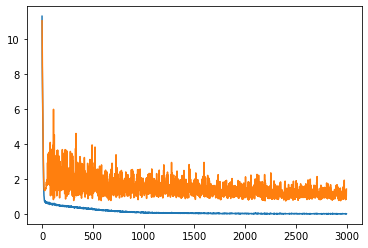

In [9]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

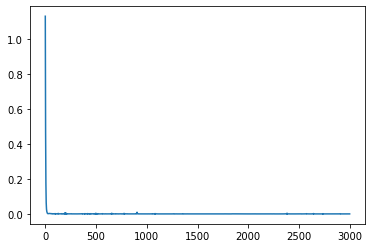

In [8]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [9]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[0.8285064 ]
 [0.78705704]
 [0.81991905]
 [0.77961344]
 [0.8121351 ]
 [0.77006906]
 [0.80315495]
 [0.8417868 ]
 [0.8036727 ]
 [0.8379621 ]
 [0.7977109 ]
 [0.8308347 ]
 [0.7906517 ]
 [0.822527  ]
 [0.7833243 ]
 [0.8162939 ]
 [0.7752538 ]
 [0.80712056]
 [0.7672369 ]
 [0.8009662 ]
 [0.8389942 ]
 [0.8012946 ]
 [0.8353699 ]
 [0.7943581 ]
 [0.8285791 ]
 [0.7878496 ]
 [0.81956893]
 [0.779877  ]
 [0.81171685]
 [0.7717578 ]
 [0.81257755]
 [0.84210575]
 [0.8039835 ]
 [0.83743   ]
 [0.79859847]
 [0.8311059 ]
 [0.79162866]
 [0.8257311 ]
 [0.78405964]
 [0.8163716 ]
 [0.7764208 ]
 [0.807357  ]
 [0.7682238 ]
 [0.80093056]
 [0.838152  ]
 [0.8023516 ]
 [0.835565  ]
 [0.7953407 ]
 [0.82896376]
 [0.789004  ]
 [0.8218602 ]
 [0.780109  ]
 [0.812664  ]
 [0.77209014]
 [0.80828154]
 [0.8420698 ]
 [0.80388355]
 [0.8376506 ]
 [0.7998676 ]
 [0.8334796 ]
 [0.7918471 ]
 [0.82614964]
 [0.7850675 ]
 [0.8161115 ]
 [0.7768625 ]
 [0.80741763]
 [0.76869756]
 [0.8019859 ]
 [0.84184986]
 [0.8021987 ]
 [0.8353167 ]
 [0.79

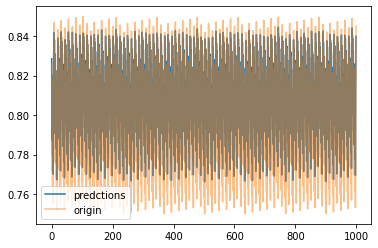

In [10]:
plt.figure()
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


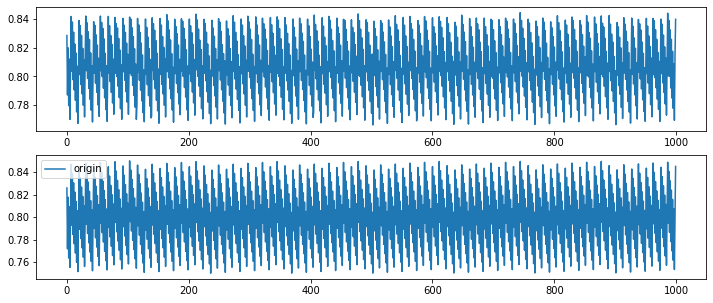

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

(1000, 1)